# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


In [40]:
# Get the datasets
!wget http://huang.eng.unt.edu/CSCE-5218/test.dat
!wget http://huang.eng.unt.edu/CSCE-5218/train.dat


--2024-02-18 23:49:23--  http://huang.eng.unt.edu/CSCE-5218/test.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2844 (2.8K)
Saving to: ‘test.dat.3’

test.dat.3          100%[===================>]   2.78K  --.-KB/s    in 0s      

2024-02-18 23:49:23 (257 MB/s) - ‘test.dat.3’ saved [2844/2844]

--2024-02-18 23:49:23--  http://huang.eng.unt.edu/CSCE-5218/train.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11244 (11K)
Saving to: ‘train.dat.3’

train.dat.3         100%[===================>]  10.98K  --.-KB/s    in 0s      

2024-02-18 23:49:23 (181 MB/s) - ‘train.dat.3’ saved [11244/11244]



In [41]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this.

In [42]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    return sum(x * y for x, y in zip(array1, array2))


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    return 1 / (1 + math.exp(-x))

# The output of the model, which for the perceptron is
# the sigmoid function applied to the dot product of
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model
    return sigmoid(dot_product(weight, instance))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    return 1 if output(weights, instance) >= 0.5 else 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate)
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    # initialize weights
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            # calculating dot product of weights & instances
            in_value = dot_product(weights, instance)
            # compute output of perceptron
            output = sigmoid(in_value)
            # calculating the error
            error = instance[-1] - output
            # updating weights
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [43]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)


Both are same because predict function is calling output and output function is calling dot product finally. it will just make the code bit smaller.
For better redability we can use predict function directly.

But we will come to know what happening behind predict function if we use all these dot product, sigmoid functions.

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above)


In [44]:
# Define function to split data into training and test sets
def split_data(data, percent):
    num_train = int(len(data) * percent / 100)
    return data[:num_train], data[num_train:]

# Load test dataset
instances_te = read_data("test.dat")

# Iterate over all combinations of hyperparameters
for tr_percent in [5, 10, 25, 50, 75, 100]:
    for num_epochs in [5, 10, 20, 50, 100]:
        for lr in [0.005, 0.01, 0.05]:
            # Load and split training dataset
            instances_tr = read_data("train.dat")
            train_data, _ = split_data(instances_tr, tr_percent)
            # Train the perceptron
            weights = train_perceptron(train_data, lr, num_epochs)
            # Calculate accuracy on test dataset
            accuracy = get_accuracy(weights, instances_te)
            grid[i, j, k] = accuracy
            # Print the result
            print(f"# tr: {tr_percent:3}, epochs: {num_epochs:3}, learning rate: {lr:.3f}; "
                  f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")


# tr:   5, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:   5, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr:   5, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
# tr:   5, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:   5, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr:   5, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
# tr:   5, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:   5, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr:   5, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
# tr:   5, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:   5, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr:   5, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
# tr

In [45]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 74.0
#tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 78.0
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 77.0
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 20, epochs: 100

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)

A. No need to use 100% training data to achieve the highest accuracy on the test dataset. Even with the 75% of training data, the accuracy on the test data set is high, compared to using entire dataset i.e 100%.

B. Because the additional might contain noise or outliners as this will effect the learning process so even with the additional data the accuracy got reduced.
Additionally the increase in training data will not lead to generalization until & unless it represents the entire data.

C. yes, we can achieve higher accuracy with additional parameters, such as increasing the no.of epoches or adjusting the learning rate accordingly.
But reaching an accuracy more than 80% needs careful tuning of hyperparameters and probably more complex models.

D. Increasing number of epoches might helps the model learning complex patterns in the training data, which results in increasing accuracy on test data set. But there is trade-off between training time and performance. If model spends too much time in training dataset it might overfit with more epoches, it might not take decisions on unseen data leading to lower accuracy.
So, it might not always worth training for more epoches.


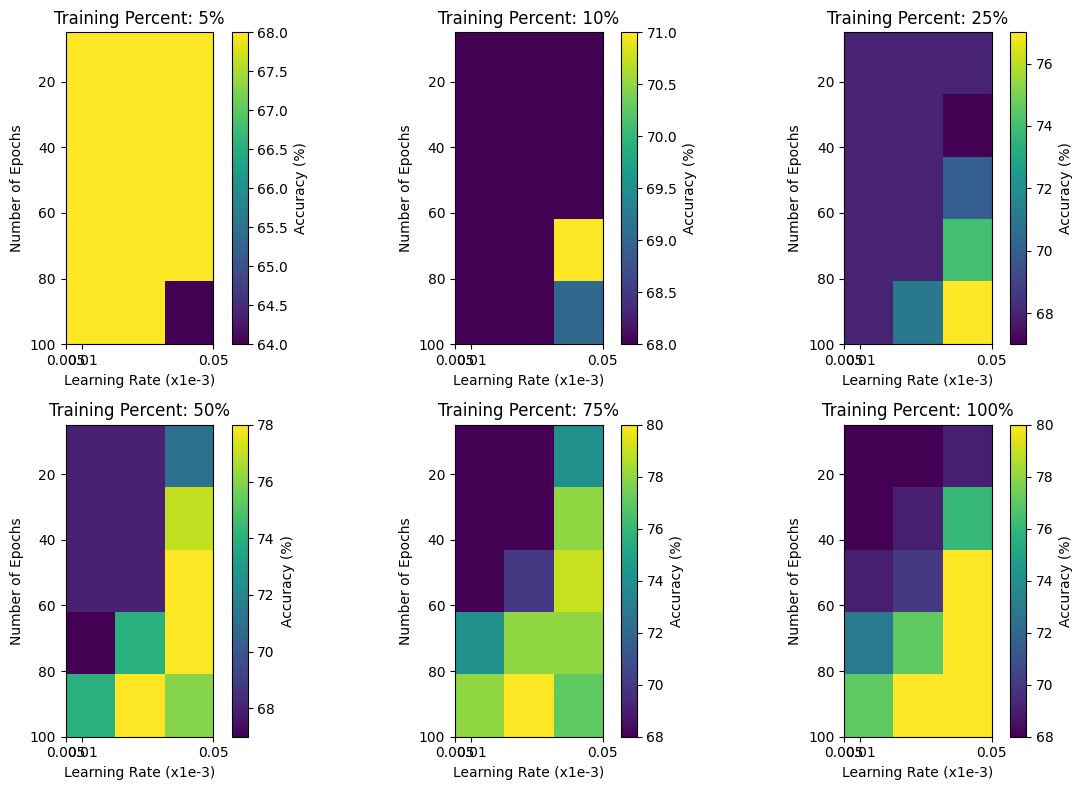

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Define hyperparameters
tr_percent_values = [5, 10, 25, 50, 75, 100]
num_epochs_values = [5, 10, 20, 50, 100]
lr_values = [0.005, 0.01, 0.05]

# Create a grid of hyperparameters
grid = np.zeros((len(tr_percent_values), len(num_epochs_values), len(lr_values)))

# Populate the grid with accuracy values
for i, tr_percent in enumerate(tr_percent_values):
    for j, num_epochs in enumerate(num_epochs_values):
        for k, lr in enumerate(lr_values):
            # Load and split training dataset
            instances_tr = read_data("train.dat")
            train_data, _ = split_data(instances_tr, tr_percent)
            # Train the perceptron
            weights = train_perceptron(train_data, lr, num_epochs)
            # Calculate accuracy on test dataset
            accuracy = get_accuracy(weights, instances_te)
            grid[i, j, k] = accuracy

# Plot heatmap
plt.figure(figsize=(12, 8))
for i, tr_percent in enumerate(tr_percent_values):
    ax = plt.subplot(2, 3, i+1)
    heatmap = ax.imshow(grid[i], cmap='viridis',
                        extent=[min(lr_values)*1000, max(lr_values)*1000,
                                max(num_epochs_values), min(num_epochs_values)])
    plt.colorbar(heatmap, label='Accuracy (%)')

    # Set the x-ticks to correspond to the learning rates
    ax.set_xticks([lr*1000 for lr in lr_values])
    ax.set_xticklabels(lr_values)

    plt.xlabel('Learning Rate (x1e-3)')
    plt.ylabel('Number of Epochs')
    plt.title(f'Training Percent: {tr_percent}%')
plt.tight_layout()
plt.show()

